The light from the Sun has to pass through more atmosphere the higher the zenith angle (the further away the Sun is from being directly above the observer).
This notebook plots the thickness of the atmosphere as a function of zenith angle, given specific parameters.

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from adetsim.atmoatt.atmospheric_attenuator import thickness_through_zenith, EARTH_RADIUS

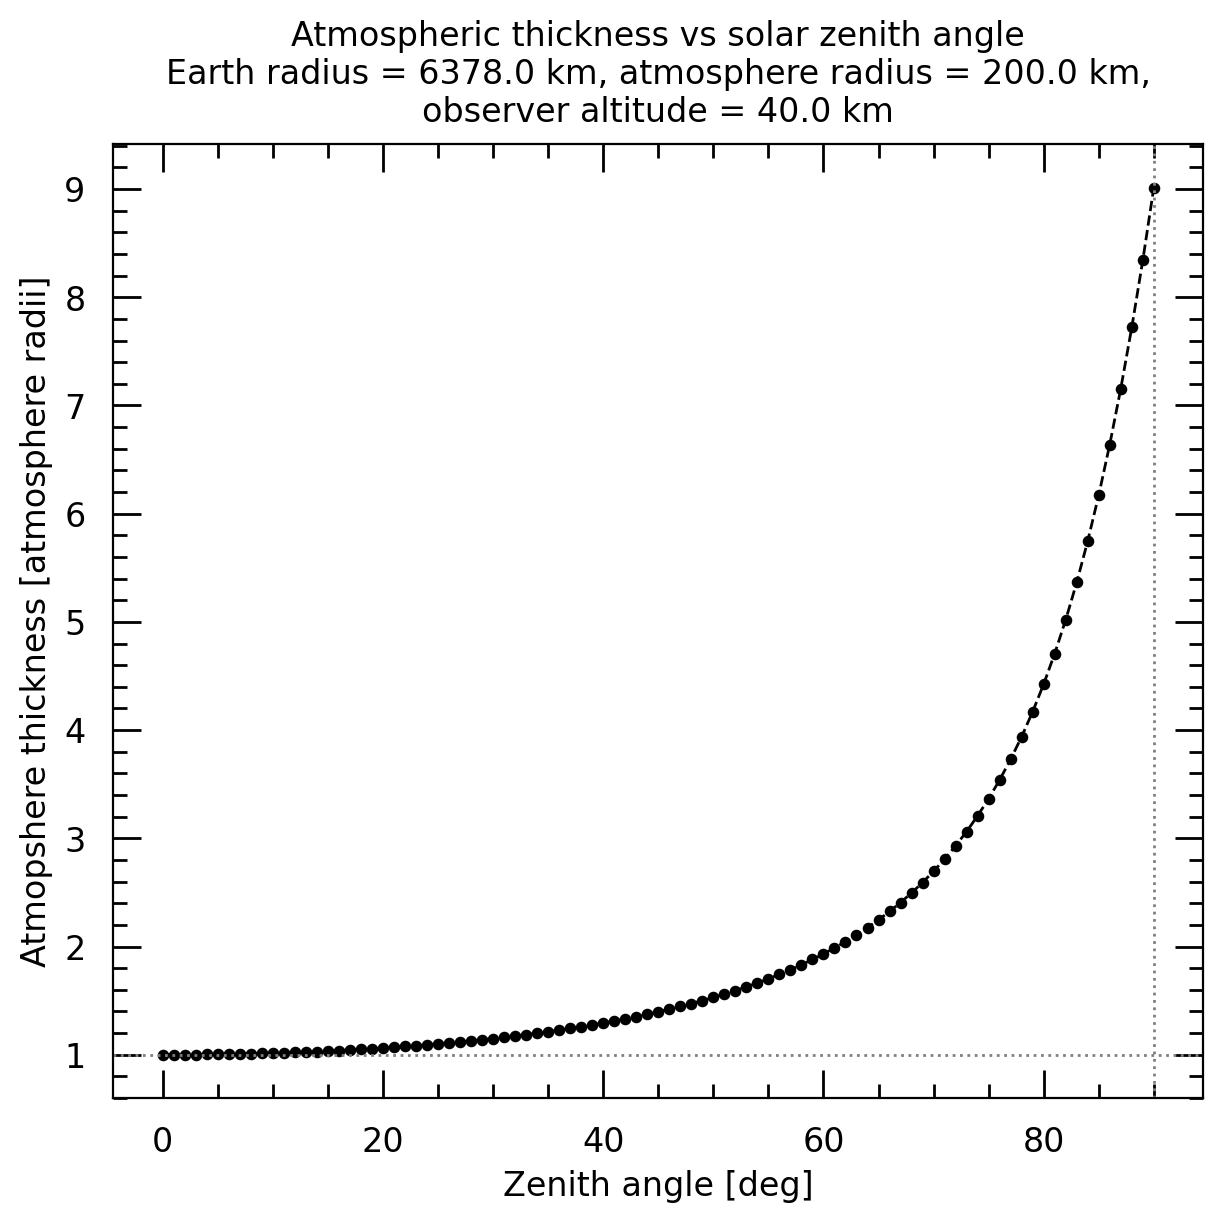

In [2]:
%matplotlib inline

zeniths = np.arange(0, 91, 1) * u.deg
observer_altitude = 40 * u.km
thicknesses = [thickness_through_zenith(z, observer_altitude=observer_altitude).value for z in zeniths]
atmospheric_radius = 200 * u.km
thickness_factors = np.array(thicknesses) * u.km / (atmospheric_radius-observer_altitude)

fig, ax = plt.subplots(figsize=(6,6), layout='constrained')
ax.scatter(zeniths, thickness_factors, c='k', s=10)
ax.plot(zeniths, thickness_factors, 'k--')
ax.set(
    xlabel=f'Zenith angle [{zeniths.unit}]',
    ylabel='Atmopshere thickness [atmosphere radii]',
    title=f'Atmospheric thickness vs solar zenith angle\nEarth radius = {EARTH_RADIUS}, atmosphere radius = {atmospheric_radius},\nobserver altitude = {observer_altitude}'
)
ax.axhline(1, c='gray', ls=':')
ax.axvline(90, c='gray', ls=':')
plt.savefig('plots/atmospheric_thickness.png')